<h1><b>Trabalho de Classificação da Disciplina de Meneração de Dados</h1></b><br>
<h2><b>Classificação de Credit Scores para bancos</h2></b><br>
    <b>Descrição do Dataset: </b> 
    Para este trabalho será utilizado um conjunto de dados de clientes bancários solicitantes de credito, o Dataset possui 438924 instância (clientes) e 71 atributos (características).<br>
    <b>Descrição da Atividade </b>
    O intuito da atividade é classificar os clientes como adimplente (target = 0) ou inadimplente (target = 1) utilizando os atributos  previsores. Para garantir uma boa classificação serão aplicadas técnicas de Mineração de Dados afim de normalizar os dados.

In [61]:
#importação bibliotecas
import pandas as pd
import numpy as np
from sklearn import preprocessing
import csv
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns  
import scikitplot as skplt

In [2]:
#carregar base no formato CSV
base = pd.read_csv('BASE_HIVE.csv', sep=',')

In [3]:
#5 primeiras ocorrencias 
base.head()

,bas.hs_cpf,bas.safra,bas.tempocpf,bas.distcentrocidade,bas.orientacao_sexual,bas.religiao,bas.distzonarisco,bas.qtdendereco,bas.qtdemail,bas.qtdcelular,...,ren.estimativarenda,ren.qtddeclaracaoisenta,ren.qtddeclaracao10,ren.qtddeclaracaorest10,ren.qtddeclaracaopagar10,ren.restituicaoagenciaaltarenda,ren.bolsafamilia,ren.anosultimarestituicao,ren.anosultimadeclaracao,ren.anosultimadeclaracaopagar
0,539806,TESTE,17,15238,HETERO,OUTRAS,93,3,2,4,...,8500,0,2,1,1,0,0,1,1,5
1,638478,TESTE,5,-9999,HETERO,CATOLICA,-9999,0,0,0,...,900,0,0,0,0,0,0,-9998,-9998,-9998
2,55924,TREINO,16,0,HETERO,CATOLICA,268794,1,1,1,...,4500,7,0,0,0,0,0,-9998,13,-9998
3,339504,TREINO,11,10805,HETERO,CATOLICA,1140,3,1,1,...,3000,0,0,0,0,0,0,-9998,-9998,-9998
4,677172,TESTE,17,0,HETERO,EVANGELICA,146638,4,0,1,...,1000,0,0,0,0,0,0,-9998,-9998,-9998


In [4]:
#exibindo o numero de linhas e colunas do dataset
base.shape
print('Numero de linhas: {:.0f}'.format(base.shape[0]))
print('Numero de colunas: {:.0f}'.format(base.shape[1]))

Numero de linhas: 438924
Numero de colunas: 71


<b>Como é possível ver acima, essa base possui atributos que não agregam valor à classificação, como por exemplo, "orientação_sexual", "religião" entre outros, sendo assim, após analise, esses atributos foram retirados da base. Abaixo segue a relação dos atributos considerados relevantes para classificação:</b><br>
bas.tempocpf<br>
bas.celularprocon<br>
bas.telfixoprocon<br>
ren.estimativarenda<br>
ren.qtddeclaracaoisenta<br>
ren.qtddeclaracao10<br>
ren.bolsafamilia<br>
emp.indiceemprego<br>
emp.porteempregador<br>
emp.socioempresa<br>
emp.funcionariopublico<br>
emp.segmentacao<br>
emp.segmentacaocobranca<br>
fam.mediarendacasa<br>
fam.bolsafamiliacasa<br>
fam.funcionariopublicocasa<br>
reg.idhmunicipio<br>
<b>bas.target</b><br>

In [5]:
base_filtrada = base[['bas.tempocpf', 
                      'bas.celularprocon', 
                      'bas.telfixoprocon', 
                      'ren.estimativarenda', 
                      'ren.qtddeclaracaoisenta',
                      'ren.qtddeclaracao10',
                      'ren.bolsafamilia',
                      'emp.indiceemprego',
                      'emp.porteempregador',
                      'emp.socioempresa',
                      'emp.funcionariopublico',
                      'emp.segmentacao',
                      'emp.segmentacaocobranca',
                      'fam.mediarendacasa',
                      'fam.bolsafamiliacasa',
                      'fam.funcionariopublicocasa',
                      'reg.idhmunicipio',
                      'bas.target']]

In [6]:
#exibindo o numero de linhas e colunas do dataset
base_filtrada.shape
print('Numero de linhas: {:.0f}'.format(base_filtrada.shape[0]))
print('Numero de colunas: {:.0f}'.format(base_filtrada.shape[1]))

Numero de linhas: 438924
Numero de colunas: 18


In [7]:
base_filtrada.head(15)

,bas.tempocpf,bas.celularprocon,bas.telfixoprocon,ren.estimativarenda,ren.qtddeclaracaoisenta,ren.qtddeclaracao10,ren.bolsafamilia,emp.indiceemprego,emp.porteempregador,emp.socioempresa,emp.funcionariopublico,emp.segmentacao,emp.segmentacaocobranca,fam.mediarendacasa,fam.bolsafamiliacasa,fam.funcionariopublicocasa,reg.idhmunicipio,bas.target
0,17,1,0,8500,0,2,0,5,2,0,0,4,0,-9999,-9999,-9999,80,0.0
1,5,0,0,900,0,0,0,0,0,0,0,2,0,-9999,-9999,-9999,-9999,0.0
2,16,0,0,4500,7,0,0,0,0,0,0,0,0,-9999,-9999,-9999,70,0.0
3,11,0,0,3000,0,0,0,0,2,1,0,1,0,-9999,-9999,-9999,73,0.0
4,17,0,0,1000,0,0,0,3,2,0,0,0,0,-9999,-9999,-9999,72,0.0
5,6,0,0,1100,0,0,0,2,4,0,0,0,0,1050,0,1,-9999,0.0
6,6,0,0,800,0,0,0,0,0,0,0,1,0,1900,0,0,76,0.0
7,25,0,0,1000,0,0,0,0,0,1,0,4,0,933,0,0,74,0.0
8,11,0,0,1100,0,0,0,3,4,0,0,5,1,-9999,-9999,-9999,78,0.0
9,5,0,0,900,0,0,0,0,0,0,0,1,0,-9999,-9999,-9999,-9999,0.0


<b>O comando acima mostra que alguns atributos possuem muitas valores incorretos (-9999), por isso será necessário uma analise da quantidades desses valores exitem em cada atributo restante para que possamos descidir se o atributo em questão será útil para classificação.</b>

In [8]:
# Mostrando a quantidade de valores -9999 em cada atributo
disc_col_val={}
disc_porcent=[]
for column in base_filtrada:
    val = base_filtrada[column].value_counts()
    porcento = base_filtrada[column].value_counts(normalize=True)
    try:
        print(f'Numero de ocorrências do valor -9999 para o atributo {column} = {val[-9999]}')
        print(f'Porcentagem de ocorrencias valor -9999 para o atributo {column}= {porcento[-9999]*100} %')
        print('')
        disc_col_val[column]=val[-9999]
        #disc_porcent[column]=porcento[-9999]*100
        disc_porcent.append([column, round(porcento[-9999]*100, 2)])
    except:
        print(f'O atributo {column} não possui ocorrências do valor -9999')
        disc_col_val[column]=0
        #disc_porcent[column]=0
        disc_porcent.append([column, 0])

Numero de ocorrências do valor -9999 para o atributo bas.tempocpf = 13740
Porcentagem de ocorrencias valor -9999 para o atributo bas.tempocpf= 3.1303824807939415 %

Numero de ocorrências do valor -9999 para o atributo bas.celularprocon = 5667
Porcentagem de ocorrencias valor -9999 para o atributo bas.celularprocon= 1.2911119009213439 %

Numero de ocorrências do valor -9999 para o atributo bas.telfixoprocon = 5667
Porcentagem de ocorrencias valor -9999 para o atributo bas.telfixoprocon= 1.2911119009213439 %

Numero de ocorrências do valor -9999 para o atributo ren.estimativarenda = 5667
Porcentagem de ocorrencias valor -9999 para o atributo ren.estimativarenda= 1.2911119009213439 %

Numero de ocorrências do valor -9999 para o atributo ren.qtddeclaracaoisenta = 5667
Porcentagem de ocorrencias valor -9999 para o atributo ren.qtddeclaracaoisenta= 1.2911119009213439 %

Numero de ocorrências do valor -9999 para o atributo ren.qtddeclaracao10 = 5667
Porcentagem de ocorrencias valor -9999 para

In [9]:
df_teste = pd.DataFrame(disc_porcent)
df_teste

,0,1
0,bas.tempocpf,3.13
1,bas.celularprocon,1.29
2,bas.telfixoprocon,1.29
3,ren.estimativarenda,1.29
4,ren.qtddeclaracaoisenta,1.29
5,ren.qtddeclaracao10,1.29
6,ren.bolsafamilia,1.29
7,emp.indiceemprego,1.29
8,emp.porteempregador,1.29
9,emp.socioempresa,1.29


In [10]:
df_teste.columns = ['Atributo', ' % ']

In [11]:
df_teste.to_excel("output.xlsx")

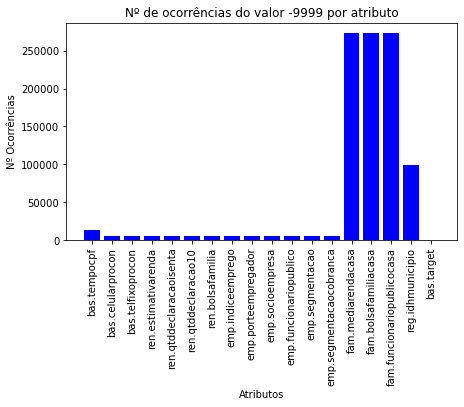

In [12]:
# Gráfico mostrando o número de ocorrências do valor -9999 em  cada atributo
plt.figure(figsize=(7,4))
plt.bar(disc_col_val.keys(), disc_col_val.values(), color='blue' )
plt.xticks(rotation='vertical')
plt.ylabel('Nº Ocorrências')
plt.xlabel('Atributos')
plt.title('Nº de ocorrências do valor -9999 por atributo')
plt.savefig('nOcorr-9999.png', dpi=300)
plt.show()

<b>Os atributos que possuem mais de 20% de valores incorretos não serão utilizados na classificação. Sendo assim os seguintes atributos serão deletados da base:</b><br>
fam.mediarendacasa<br>
fam.bolsafamiliacasa<br>
fam.funcionariopublicocasa<br>
reg.idhmunicipio


In [13]:
# apagando colunas da base
base_filtrada = base_filtrada.drop(columns=['fam.mediarendacasa',
                                   'fam.bolsafamiliacasa',
                                   'fam.funcionariopublicocasa',
                                   'reg.idhmunicipio'])

In [14]:
base_filtrada.head()

,bas.tempocpf,bas.celularprocon,bas.telfixoprocon,ren.estimativarenda,ren.qtddeclaracaoisenta,ren.qtddeclaracao10,ren.bolsafamilia,emp.indiceemprego,emp.porteempregador,emp.socioempresa,emp.funcionariopublico,emp.segmentacao,emp.segmentacaocobranca,bas.target
0,17,1,0,8500,0,2,0,5,2,0,0,4,0,0.0
1,5,0,0,900,0,0,0,0,0,0,0,2,0,0.0
2,16,0,0,4500,7,0,0,0,0,0,0,0,0,0.0
3,11,0,0,3000,0,0,0,0,2,1,0,1,0,0.0
4,17,0,0,1000,0,0,0,3,2,0,0,0,0,0.0


In [15]:
#exibindo o numero de linhas e colunas do dataset
base_filtrada.shape
print('Numero de linhas: {:.0f}'.format(base_filtrada.shape[0]))
print('Numero de colunas: {:.0f}'.format(base_filtrada.shape[1]))

Numero de linhas: 438924
Numero de colunas: 14


<br><b>Como ainda existem instância com valor incorretos será necessário efetuar a substituição desses valores.<br>
O Comando a baixo subsitui os valores incorretos pelo valor mais frequente em casa atributo.

In [16]:
# Substituindo valores incorreots pelos valores mais frequentes 
from sklearn.impute import SimpleImputer
for column in base_filtrada:
    imputer = SimpleImputer(missing_values = -9999, strategy = 'most_frequent')
    imputer = imputer.fit(base_filtrada[[column]])
    base_filtrada[[column]] = imputer.transform(base_filtrada[[column]])

In [17]:
base_filtrada.head(15)

,bas.tempocpf,bas.celularprocon,bas.telfixoprocon,ren.estimativarenda,ren.qtddeclaracaoisenta,ren.qtddeclaracao10,ren.bolsafamilia,emp.indiceemprego,emp.porteempregador,emp.socioempresa,emp.funcionariopublico,emp.segmentacao,emp.segmentacaocobranca,bas.target
0,17,1,0,8500,0,2,0,5,2,0,0,4,0,0.0
1,5,0,0,900,0,0,0,0,0,0,0,2,0,0.0
2,16,0,0,4500,7,0,0,0,0,0,0,0,0,0.0
3,11,0,0,3000,0,0,0,0,2,1,0,1,0,0.0
4,17,0,0,1000,0,0,0,3,2,0,0,0,0,0.0
5,6,0,0,1100,0,0,0,2,4,0,0,0,0,0.0
6,6,0,0,800,0,0,0,0,0,0,0,1,0,0.0
7,25,0,0,1000,0,0,0,0,0,1,0,4,0,0.0
8,11,0,0,1100,0,0,0,3,4,0,0,5,1,0.0
9,5,0,0,900,0,0,0,0,0,0,0,1,0,0.0


In [119]:
# Mostrando a quantidade de valores -9999 em cada atributo
for column in base_filtrada:
    val = base_filtrada[column].value_counts()
    porcento = base_filtrada[column].value_counts(normalize=True)
    try:
        print(f'Numero de ocorrências do valor -9999 para o atributo {column} = {val[-9999]}')
        print(f'Porcentagem de ocorrencias valor -9999 para o atributo {column}= {porcento[-9999]*100} %')
        print('')
    except:
        print(f'O atributo {column} NÃO possui ocorrências do valor -9999')

O atributo bas.tempocpf NÃO possui ocorrências do valor -9999
O atributo bas.celularprocon NÃO possui ocorrências do valor -9999
O atributo bas.telfixoprocon NÃO possui ocorrências do valor -9999
O atributo ren.estimativarenda NÃO possui ocorrências do valor -9999
O atributo ren.qtddeclaracaoisenta NÃO possui ocorrências do valor -9999
O atributo ren.qtddeclaracao10 NÃO possui ocorrências do valor -9999
O atributo ren.bolsafamilia NÃO possui ocorrências do valor -9999
O atributo emp.indiceemprego NÃO possui ocorrências do valor -9999
O atributo emp.porteempregador NÃO possui ocorrências do valor -9999
O atributo emp.socioempresa NÃO possui ocorrências do valor -9999
O atributo emp.funcionariopublico NÃO possui ocorrências do valor -9999
O atributo emp.segmentacao NÃO possui ocorrências do valor -9999
O atributo emp.segmentacaocobranca NÃO possui ocorrências do valor -9999
O atributo bas.target NÃO possui ocorrências do valor -9999


<b>Como mostra o comando acima, os valores incorretos foram retirados da base.<br><br>

In [19]:
# mostrando a média de cada atributo 
base_filtrada.mean()

bas.tempocpf                 16.056165
bas.celularprocon             0.002456
bas.telfixoprocon             0.011134
ren.estimativarenda        3069.124723
ren.qtddeclaracaoisenta       1.049851
ren.qtddeclaracao10           1.568185
ren.bolsafamilia              0.040829
emp.indiceemprego             1.478103
emp.porteempregador           0.821712
emp.socioempresa              0.083851
emp.funcionariopublico        0.090740
emp.segmentacao               0.570377
emp.segmentacaocobranca       0.034022
bas.target                    0.096315
dtype: float64

<b>O comando acima mostrá como a os valores da base estão fora de escala

<b>Em seguida será aplicado o método MinMaxScaler com o intuito de deixas os valores no mesma escala.

In [20]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(base_filtrada)
base_filtrada = pd.DataFrame(np_scaled, columns=base_filtrada.columns)

In [120]:
base_filtrada.head()

,bas.tempocpf,bas.celularprocon,bas.telfixoprocon,ren.estimativarenda,ren.qtddeclaracaoisenta,ren.qtddeclaracao10,ren.bolsafamilia,emp.indiceemprego,emp.porteempregador,emp.socioempresa,emp.funcionariopublico,emp.segmentacao,emp.segmentacaocobranca,bas.target
0,0.629630,1.0,0.0,0.273649,0.000000,0.2,0.0,0.833333,0.5,0.0,0.0,0.8,0.0,0.0
1,0.185185,0.0,0.0,0.016892,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.4,0.0,0.0
2,0.592593,0.0,0.0,0.138514,0.777778,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.407407,0.0,0.0,0.087838,0.000000,0.0,0.0,0.000000,0.5,1.0,0.0,0.2,0.0,0.0
4,0.629630,0.0,0.0,0.020270,0.000000,0.0,0.0,0.500000,0.5,0.0,0.0,0.0,0.0,0.0


In [121]:
# mostrando a média de cada atributo 
base_filtrada.mean()

bas.tempocpf               0.594673
bas.celularprocon          0.002456
bas.telfixoprocon          0.011134
ren.estimativarenda        0.090173
ren.qtddeclaracaoisenta    0.116650
ren.qtddeclaracao10        0.156818
ren.bolsafamilia           0.040829
emp.indiceemprego          0.246351
emp.porteempregador        0.205428
emp.socioempresa           0.083851
emp.funcionariopublico     0.090740
emp.segmentacao            0.114075
emp.segmentacaocobranca    0.006804
bas.target                 0.096315
dtype: float64

<b>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<b>O proximo passo é dividr as bases de treino e teste em treino_previsores, treino_classe, teste_previsores e teste_classe.

In [22]:
# Separando a base em previdores e classe
previsores = base_filtrada.iloc[:, 0:13]
classe = base_filtrada.iloc[:, 13]

In [23]:
from sklearn.model_selection import train_test_split
base_treino_previsores, base_teste_previsores, base_treino_classe, base_teste_classe = train_test_split(previsores, classe, test_size=0.20, random_state=0)

<br><b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br>
    Na célula abaixo estão todos os classificadores. 

In [89]:
# importação das bibliotecas
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import  model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


def curvaROC(X_test, y_test, model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Definição dos classificadores utilizados

def RunDecisionTreeClassifier(X_treino, y_treino, X_teste, y_teste):
    dtc = tree.DecisionTreeClassifier()
    dtc.fit(X_treino, y_treino)
    predictedTree=dtc.predict(X_teste)
    matrizTree = confusion_matrix(y_teste, predictedTree)
    resultTree = classification_report(y_pred=predictedTree, y_true=y_teste)
    curvaROC(X_teste, y_teste, dtc)
    return matrizTree, resultTree

def RunRandomForestClassifier(X_treino, y_treino, X_teste, y_teste):
    rfc = RandomForestClassifier(n_estimators=120, criterion='entropy', random_state=0)
    rfc.fit(X_treino, y_treino)
    predictedRandom=rfc.predict(X_teste)
    matrizRandom = confusion_matrix(y_teste, predictedRandom)
    resultRandom = classification_report(y_pred=predictedRandom, y_true=y_teste)
    curvaROC(X_teste, y_teste, rfc)
    return matrizRandom, resultRandom

def RunGaussianNB(X_treino, y_treino, X_teste, y_teste):
    gnb = GaussianNB()
    gnb.fit(X_treino, y_treino)
    predictedGNB=gnb.predict(X_teste)
    matrizGNB = confusion_matrix(y_teste, predictedGNB)
    resultGNB = classification_report(y_pred=predictedGNB, y_true=y_teste)
    curvaROC(X_teste, y_teste, gnb)
    return matrizGNB, resultGNB

def RunLogisticRegression(X_treino, y_treino, X_teste, y_teste):
    lr = LogisticRegression()
    lr.fit(X_treino, y_treino)
    predictedLR=lr.predict(X_teste)
    matrizLR = confusion_matrix(y_teste, predictedLR)
    resultLR = classification_report(y_pred=predictedLR, y_true=y_teste)
    curvaROC(X_teste, y_teste, lr)
    return matrizLR, resultLR

def RunKNeighborsClassifier(X_treino, y_treino, X_teste, y_teste):
    knn = classifier = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_treino, y_treino)
    predictedKNN=knn.predict(X_teste)
    matrizKNN = confusion_matrix(y_teste, predictedKNN)
    resultKNN = classification_report(y_pred=predictedKNN, y_true=y_teste)
    curvaROC(X_teste, y_teste, knn)
    return matrizKNN, resultKNN

<b><br>Os comando abaixo mostram o numero de ocorrencias do atributo alvo.<br>
    0.0 -> adimplente<br>
    1.0 -> inadimplente

<b>Porcentagem da base final

In [25]:
nClassesBase = base_filtrada['bas.target'].value_counts()
nClassesBase

0.0    396649
1.0     42275
Name: bas.target, dtype: int64

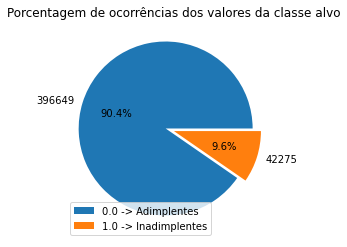

In [26]:
labels = ['0.0 -> Adimplentes', '1.0 -> Inadimplentes']
explode = (0.1, 0)
plt.pie(nClassesBase, labels=nClassesBase.values, autopct='%1.1f%%', explode=explode)
plt.legend(labels, loc=3 )
plt.title('Porcentagem de ocorrências dos valores da classe alvo');
plt.savefig('porcentPizza.png', dpi=300)
plt.show()

<br><b>Porcentagem da base de treino

In [27]:
nClassesTreino = base_treino_classe.value_counts()
nClassesTreino

0.0    317386
1.0     33753
Name: bas.target, dtype: int64

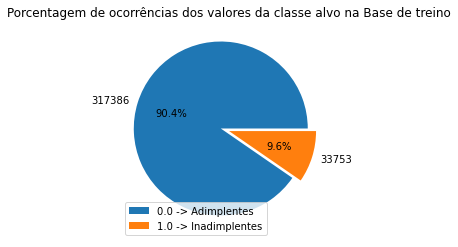

In [28]:
labels = ['0.0 -> Adimplentes', '1.0 -> Inadimplentes']
explode = (0.1, 0)
plt.pie(nClassesTreino, labels=nClassesTreino.values, autopct='%1.1f%%', explode=explode)
plt.legend(labels, loc=3 )
plt.title('Porcentagem de ocorrências dos valores da classe alvo na Base de treino');
plt.savefig('porcentPizzaTreino0.png', dpi=300)
plt.show()

<br><b>Porcentagem da base de teste

In [29]:
nClassesTeste = base_teste_classe.value_counts()
nClassesTeste

0.0    79263
1.0     8522
Name: bas.target, dtype: int64

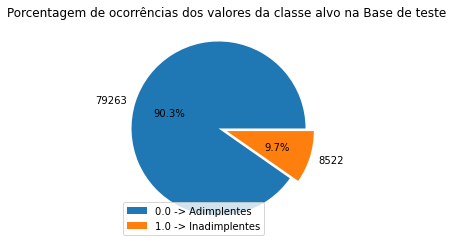

In [30]:
labels = ['0.0 -> Adimplentes', '1.0 -> Inadimplentes']
explode = (0.1, 0)
plt.pie(nClassesTeste, labels=nClassesTeste.values, autopct='%1.1f%%', explode=explode)
plt.legend(labels, loc=3 )
plt.title('Porcentagem de ocorrências dos valores da classe alvo na Base de teste');
plt.savefig('porcentPizzaTeste0.png', dpi=300)
plt.show()

<b>As figuras acima mostram o desbalanceamento da classe alvo, onde o número de inadimplentes (1.0) é muito MENOR que os não inadimplentes (0.0).<br>
    Como referência, será utilizado a base desbalenceada nessa primeira classificação.

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    <br>Em seguida será feita a classificação utilizando a base desbalanceada

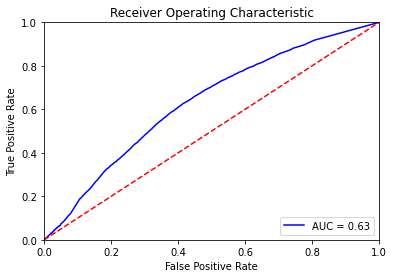

Matriz de Confusão:
[[78570   693]
 [ 8413   109]]

Resultados da classificação
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95     79263
         1.0       0.14      0.01      0.02      8522

    accuracy                           0.90     87785
   macro avg       0.52      0.50      0.48     87785
weighted avg       0.83      0.90      0.86     87785



In [90]:
matrizRandom0, resultRandom0 = RunRandomForestClassifier(base_treino_previsores, base_treino_classe, base_teste_previsores, base_teste_classe)
print('Matriz de Confusão:')
print(matrizRandom0)
print()
print('Resultados da classificação')
print(resultRandom0)

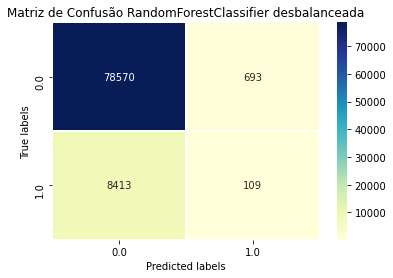

In [91]:
#ax= plt.subplot()
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(matrizRandom0, annot=True, ax = ax, fmt="d", linewidths=.5, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Matriz de Confusão RandomForestClassifier desbalanceada'); 
ax.xaxis.set_ticklabels(['0.0', '1.0']); ax.yaxis.set_ticklabels(['0.0', '1.0']);
f.savefig('random0.png', dpi=300)

<b>Os resultados acima foram obtidos utilizando a base desbalanceada, onde o número de inadimplentes (1.0) é muito menor que os não inadimplentes (0.0). Como mostram os resultado o classificador obteve um resultado muito bom em classificar os adimplentes, porém obteve um resultado péssimo em classificar os inadimplentes.<br>
    Sendo assim será necessário efetuar uma balanceamento da base.<br>
    Para isso será utilizado o método NearMiss.


<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br>
    Em seguida será ralizada um balanceamento na base

In [92]:
# Usando o metodo NearMiss para balencear a Base
from imblearn.under_sampling import NearMiss

nr = NearMiss()
previsoresBalaceados1, classeBalanceada1 = nr.fit_resample(previsores, classe)

In [93]:
nClassesBalanceadas1 = classeBalanceada1.value_counts()
nClassesBalanceadas1

1.0    42275
0.0    42275
Name: bas.target, dtype: int64

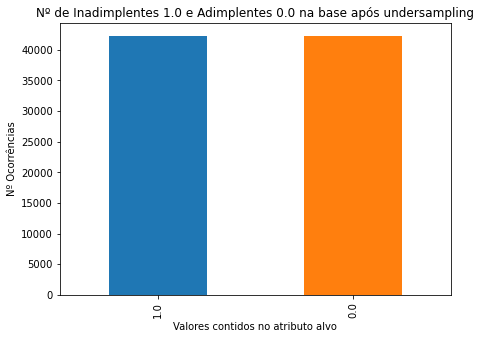

In [94]:
nClassesBalanceadas1.plot(kind='bar', 
                  title='Nº de Inadimplentes 1.0 e Adimplentes 0.0 na base após undersampling',
                  color = ['#1F77B4', '#FF7F0E'],
                  figsize=(7,5),
                  ylabel='Nº Ocorrências',
                  xlabel='Valores contidos no atributo alvo');

<b>Como mostra a figura acima, é possível ver que agora a base esta balanceada.<br>
    ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br>
    Em seguida a nova base será utilizada para classificação.

In [95]:
from sklearn.model_selection import train_test_split
previsores_treinamento_bal1, previsores_teste_bal1, classe_treinamento_bal1, classe_teste_bal1 = train_test_split(previsoresBalaceados1, classeBalanceada1, test_size=0.20, random_state=0)

In [96]:
nClassesBaseTesteBalNearMiss = classe_teste_bal1.value_counts()
nClassesBaseTesteBalNearMiss

1.0    8582
0.0    8328
Name: bas.target, dtype: int64

In [97]:
nClassesBaseTreinoBalNearMiss = classe_treinamento_bal1.value_counts()
nClassesBaseTreinoBalNearMiss

0.0    33947
1.0    33693
Name: bas.target, dtype: int64

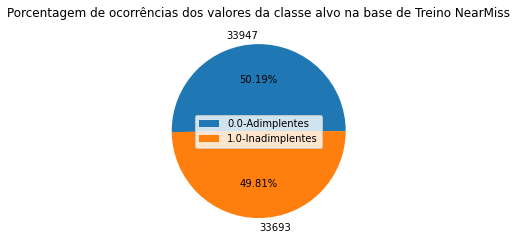

In [98]:
labels = ['0.0-Adimplentes', '1.0-Inadimplentes']
explode = (0.05, 0)
plt.pie(nClassesBaseTreinoBalNearMiss, labels=nClassesBaseTreinoBalNearMiss.values, autopct='%1.2f%%')
plt.legend(labels, loc=10 )
plt.title('Porcentagem de ocorrências dos valores da classe alvo na base de Treino NearMiss');
plt.savefig('porcentPizzaTtrinoNearMiss.png', dpi=300)
plt.show()

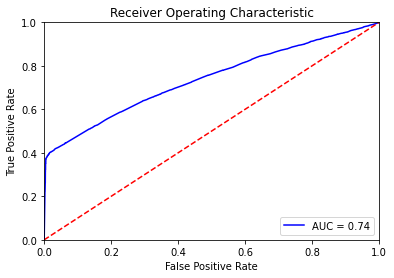

Classificador Random Forest Classifier com balanceamento NearMiss
Matriz de Confusão:
[[7820  508]
 [4799 3783]]

Resultados da classificação
              precision    recall  f1-score   support

         0.0       0.62      0.94      0.75      8328
         1.0       0.88      0.44      0.59      8582

    accuracy                           0.69     16910
   macro avg       0.75      0.69      0.67     16910
weighted avg       0.75      0.69      0.67     16910



In [99]:
matrizRandom1, resultRandom1 = RunRandomForestClassifier(previsores_treinamento_bal1, classe_treinamento_bal1, previsores_teste_bal1, classe_teste_bal1)
print('Classificador Random Forest Classifier com balanceamento NearMiss')
print('Matriz de Confusão:')
print(matrizRandom1)
print()
print('Resultados da classificação')
print(resultRandom1)

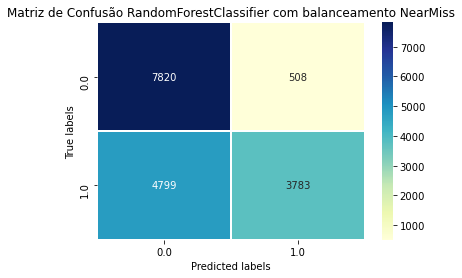

In [100]:
#ax= plt.subplot()
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(matrizRandom1, annot=True, ax = ax, fmt="d", linewidths=.5, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Matriz de Confusão RandomForestClassifier com balanceamento NearMiss'); 
ax.xaxis.set_ticklabels(['0.0', '1.0']); ax.yaxis.set_ticklabels(['0.0', '1.0']);
f.savefig('random1.png', dpi=300)

<br><b>Com o método NearMiss, que reduz o número de instancia com o atributo alvo com mais valores, os resultados tiveram uma melhora porém ainda não foram satisfatórios<br>
    ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<b>Em segiuda será utilizado o método SMOTE()

In [101]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
previsoresBalaceados2, classeBalanceada2 = smt.fit_resample(previsores, classe)

In [102]:
nClassesBalanceadas2 = classeBalanceada2.value_counts()
nClassesBalanceadas2

1.0    396649
0.0    396649
Name: bas.target, dtype: int64

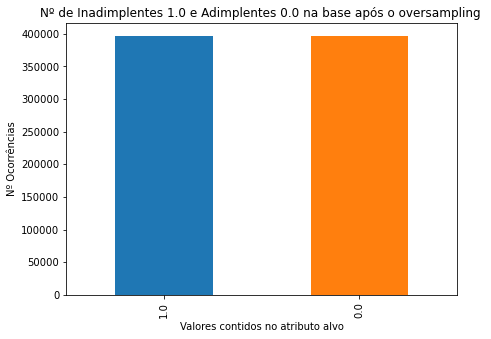

In [103]:
nClassesBalanceadas2.plot(kind='bar', 
                  title='Nº de Inadimplentes 1.0 e Adimplentes 0.0 na base após o oversampling ',
                  color = ['#1F77B4', '#FF7F0E'],
                  figsize=(7,5),
                  ylabel='Nº Ocorrências',
                  xlabel='Valores contidos no atributo alvo');

<b>Como mostra a figura acima, é possível ver que agora a base esta balanceada.<br>
    ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br>
    Em seguida a nova base será utilizada para classificação.

In [104]:
from sklearn.model_selection import train_test_split
previsores_treinamento_bal2, previsores_teste_bal2, classe_treinamento_bal2, classe_teste_bal2 = train_test_split(previsoresBalaceados2, classeBalanceada2, test_size=0.20, random_state=0)

In [105]:
nClassesBaseTesteBalSMOTE = classe_teste_bal2.value_counts()
nClassesBaseTesteBalSMOTE

1.0    79666
0.0    78994
Name: bas.target, dtype: int64

In [106]:
nClassesBaseTreinoBalSMOTE = classe_treinamento_bal2.value_counts()
nClassesBaseTreinoBalSMOTE

0.0    317655
1.0    316983
Name: bas.target, dtype: int64

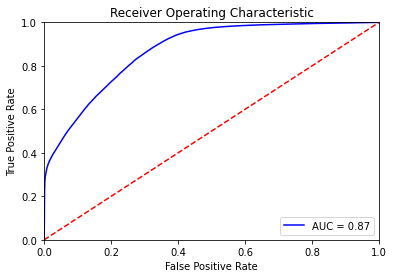

Classificador Random Forest Classifier com balanceamento SMOTE
Matriz de Confusão:
[[53921 25073]
 [ 9839 69827]]

Resultados da classificação
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76     78994
         1.0       0.74      0.88      0.80     79666

    accuracy                           0.78    158660
   macro avg       0.79      0.78      0.78    158660
weighted avg       0.79      0.78      0.78    158660



In [107]:
matrizRandom2, resultRandom2 = RunRandomForestClassifier(previsores_treinamento_bal2, classe_treinamento_bal2, previsores_teste_bal2, classe_teste_bal2)
print('Classificador Random Forest Classifier com balanceamento SMOTE')
print('Matriz de Confusão:')
print(matrizRandom2)
print()
print('Resultados da classificação')
print(resultRandom2)

<br><b>Os resultados da classificação utilizando o método de balanceamento SMOTE se mostram ligeiramente melhor em relação ao NearMiss, sendo assim, os demais testes serão realizados utilizando os dados normalizados com o SMOTE. 

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br>
    Em seguida os resultados do obitos serão comparados com os resultados dos classificador GaussianNB, LogisticRegression e DecisionTreeClassifier.

<b><br>Resultados do classificador GaussianNB

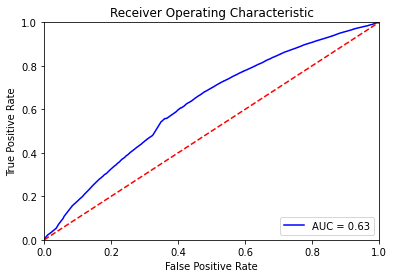

Matriz de Confusão:
[[27132 51862]
 [14420 65246]]

Resultados da classificação
              precision    recall  f1-score   support

         0.0       0.65      0.34      0.45     78994
         1.0       0.56      0.82      0.66     79666

    accuracy                           0.58    158660
   macro avg       0.61      0.58      0.56    158660
weighted avg       0.60      0.58      0.56    158660



In [108]:
matrizGNB, resultGNB = RunGaussianNB(previsores_treinamento_bal2, classe_treinamento_bal2, previsores_teste_bal2, classe_teste_bal2)
print('Matriz de Confusão:')
print(matrizGNB)
print()
print('Resultados da classificação')
print(resultGNB)

<b><br>Resultados do classificador LogisticRegression

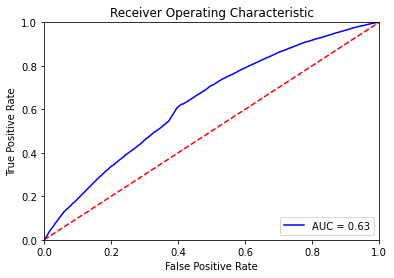

Matriz de Confusão:
[[41735 37259]
 [25477 54189]]

Resultados da classificação
              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57     78994
         1.0       0.59      0.68      0.63     79666

    accuracy                           0.60    158660
   macro avg       0.61      0.60      0.60    158660
weighted avg       0.61      0.60      0.60    158660



In [109]:
matrizLR, resultLR = RunLogisticRegression(previsores_treinamento_bal2, classe_treinamento_bal2, previsores_teste_bal2, classe_teste_bal2)
print('Matriz de Confusão:')
print(matrizLR)
print()
print('Resultados da classificação')
print(resultLR)

<b><br>Resultados do classificador DecisionTreeClassifier

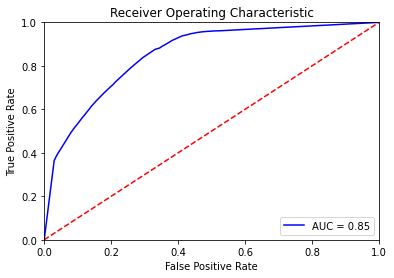

Matriz de Confusão:
[[52857 26137]
 [ 9907 69759]]

Resultados da classificação
              precision    recall  f1-score   support

         0.0       0.84      0.67      0.75     78994
         1.0       0.73      0.88      0.79     79666

    accuracy                           0.77    158660
   macro avg       0.78      0.77      0.77    158660
weighted avg       0.78      0.77      0.77    158660



In [110]:
matrizTree, resultTree = RunDecisionTreeClassifier(previsores_treinamento_bal2, classe_treinamento_bal2, previsores_teste_bal2, classe_teste_bal2)
print('Matriz de Confusão:')
print(matrizTree)
print()
print('Resultados da classificação')
print(resultTree)

<b>Resultados do classificador KNN

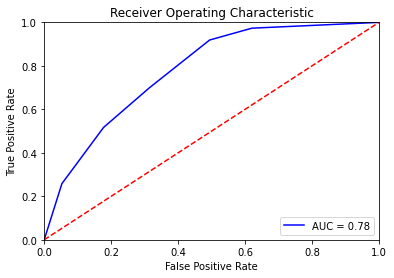

Matriz de Confusão:
[[54172 24822]
 [23969 55697]]

Resultados da classificação
              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69     78994
         1.0       0.69      0.70      0.70     79666

    accuracy                           0.69    158660
   macro avg       0.69      0.69      0.69    158660
weighted avg       0.69      0.69      0.69    158660



In [118]:
matrizKNN, resultKNN = RunKNeighborsClassifier(previsores_treinamento_bal2, classe_treinamento_bal2, previsores_teste_bal2, classe_teste_bal2)
print('Matriz de Confusão:')
print(matrizKNN)
print()
print('Resultados da classificação')
print(resultKNN)

<b><br>Como mostram os resultados, o classificador que obteve o melhor resultado foi o RandomForestClassifier. Abaixo segue novamente o resultado deste classificador:

In [111]:
print('Matriz de Confusão:')
print(matrizRandom2)
print()
print('Resultados da classificação')
print(resultRandom2)

Matriz de Confusão:
[[53921 25073]
 [ 9839 69827]]

Resultados da classificação
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76     78994
         1.0       0.74      0.88      0.80     79666

    accuracy                           0.78    158660
   macro avg       0.79      0.78      0.78    158660
weighted avg       0.79      0.78      0.78    158660



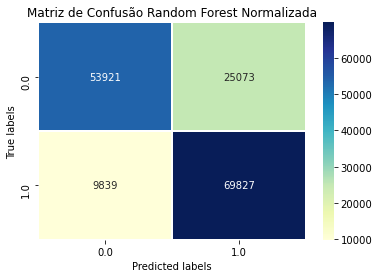

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt     

#ax= plt.subplot()
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(matrizRandom2, annot=True, ax = ax, fmt="d", linewidths=.5, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Matriz de Confusão Random Forest Normalizada'); 
ax.xaxis.set_ticklabels(['0.0', '1.0']); ax.yaxis.set_ticklabels(['0.0', '1.0']);
f.savefig('random2.png', dpi=300)

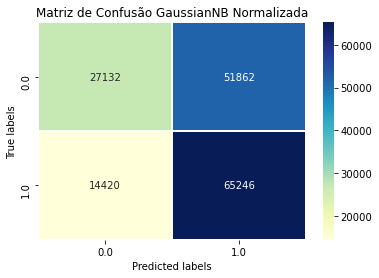

In [113]:
#ax= plt.subplot()
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(matrizGNB, annot=True, ax = ax, fmt="d", linewidths=.5, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Matriz de Confusão GaussianNB Normalizada'); 
ax.xaxis.set_ticklabels(['0.0', '1.0']); ax.yaxis.set_ticklabels(['0.0', '1.0']);
f.savefig('GaussianNB.png', dpi=300)

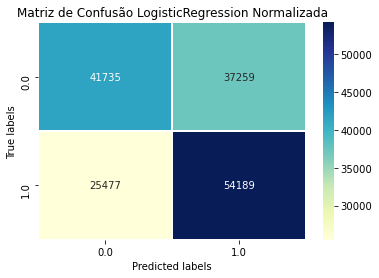

In [114]:
#ax= plt.subplot()
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(matrizLR, annot=True, ax = ax, fmt="d", linewidths=.5, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Matriz de Confusão LogisticRegression Normalizada'); 
ax.xaxis.set_ticklabels(['0.0', '1.0']); ax.yaxis.set_ticklabels(['0.0', '1.0']);
f.savefig('RL.png', dpi=300)

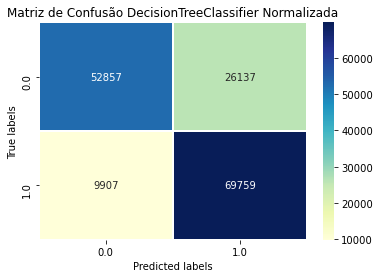

In [115]:
#ax= plt.subplot()
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(matrizTree, annot=True, ax = ax, fmt="d", linewidths=.5, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Matriz de Confusão DecisionTreeClassifier Normalizada'); 
ax.xaxis.set_ticklabels(['0.0', '1.0']); ax.yaxis.set_ticklabels(['0.0', '1.0']);
f.savefig('tree.png', dpi=300)

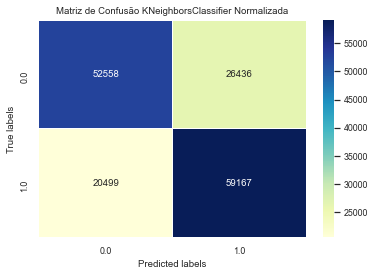

In [185]:
#ax= plt.subplot()
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(matrizKNN, annot=True, ax = ax, fmt="d", linewidths=.5, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Matriz de Confusão KNeighborsClassifier Normalizada'); 
ax.xaxis.set_ticklabels(['0.0', '1.0']); ax.yaxis.set_ticklabels(['0.0', '1.0']);
f.savefig('KNN.png', dpi=300)